<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_machine_learning/Cross_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Cross-Entropy for Machine Learning

Cross-entropy is commonly used in machine learning as a loss function.

Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.



In this example:

* How to calculate cross-entropy from scratch and using standard machine learning libraries.
* Cross-entropy can be used as a loss function when optimizing classification models like logistic regression and artificial neural networks.
* Cross-entropy is different from KL divergence but can be calculated using KL divergence, and is different from log loss but calculates the same quantity when used as a loss function.

### Cross-Entropy

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

You might recall that information quantifies the number of bits required to encode and transmit an event. Lower probability events have more information, higher probability events have less information.

In information theory, we like to describe the “surprise” of an event. An event is more surprising the less likely it is, meaning it contains more information.

* **Low Probability Event** (surprising): More information.
* **Higher Probability Event** (unsurprising): Less information.
Information h(x) can be calculated for an event x, given the probability of the event P(x) as follows:

h(x) = -log(P(x))

**Entropy** is the number of bits required to transmit a randomly selected event from a probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.

A skewed probability distribution has less “surprise” and in turn a low entropy because likely events dominate. Balanced distribution are more surprising and turn have higher entropy because events are equally likely.

* **Skewed Probability Distribution** (unsurprising): Low entropy.
* **Balanced Probability Distribution** (surprising): High entropy.

Entropy H(x) can be calculated for a random variable with a set of x in X discrete states discrete states and their probability P(x) as follows:

H(X) = – sum x in X P(x) * log(P(x))

**Cross-entropy** builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.

The intuition for this definition comes if we consider a target or underlying probability distribution P and an approximation of the target distribution Q, then the cross-entropy of Q from P is the number of additional bits to represent an event using Q instead of P.

The cross-entropy between two probability distributions, such as Q from P, can be stated formally as:

H(P, Q)

Where H() is the cross-entropy function, P may be the target distribution and Q is the approximation of the target distribution.

Cross-entropy can be calculated using the probabilities of the events from P and Q, as follows:

H(P, Q) = – sum x in X P(x) * log(Q(x))

Where P(x) is the probability of the event x in P, Q(x) is the probability of event x in Q and log is the base-2 logarithm, meaning that the results are in bits. If the base-e or natural logarithm is used instead, the result will have the units called nats.

This calculation is for discrete probability distributions, although a similar calculation can be used for continuous probability distributions using the integral across the events instead of the sum.

The result will be a positive number measured in bits and will be equal to the entropy of the distribution if the two probability distributions are identical.



### Cross-Entropy Versus KL Divergence

Cross-entropy is not KL Divergence.

Cross-entropy is related to divergence measures, such as the Kullback-Leibler, or KL, Divergence that quantifies how much one distribution differs from another.

Specifically, the KL divergence measures a very similar quantity to cross-entropy. It measures the average number of extra bits required to represent a message with Q instead of P, not the total number of bits.

As such, the KL divergence is often referred to as the “relative entropy.”

* **Cross-Entropy:** Average number of total bits to represent an event from Q instead of P.
* **Relative Entropy (KL Divergence):** Average number of extra bits to represent an event from Q instead of P.

KL divergence can be calculated as the negative sum of probability of each event in P multiples by the log of the probability of the event in Q over the probability of the event in P. Typically, log base-2 so that the result is measured in bits.

KL(P || Q) = – sum x in X P(x) * log(Q(x) / P(x))
The value within the sum is the divergence for a given event.

As such, we can calculate the cross-entropy by adding the entropy of the distribution plus the additional entropy calculated by the KL divergence. This is intuitive, given the definition of both calculations; for example:

H(P, Q) = H(P) + KL(P || Q)
Where H(P, Q) is the cross-entropy of Q from P, H(P) is the entropy of P and KL(P || Q) is the divergence of Q from P.

Entropy can be calculated for a probability distribution as the negative sum of the probability for each event multiplied by the log of the probability for the event, where log is base-2 to ensure the result is in bits.

H(P) = – sum x on X p(x) * log(p(x))
Like KL divergence, cross-entropy is not symmetrical, meaning that:

H(P, Q) != H(Q, P)
As we will see later, both cross-entropy and KL divergence calculate the same quantity when they are used as loss functions for optimizing a classification predictive model. It is under this context that you might sometimes see that cross-entropy and KL divergence are the same.

### How to Calculate Cross-Entropy

** Two Discrete Probability Distributions **

Consider a random variable with three discrete events as different colors: red, green, and blue.

We may have two different probability distributions for this variable; for example:

```
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
```

We can plot a bar chart of these probabilities to compare them directly as probability histograms.

The complete example is listed below.

P=1.000 Q=1.000


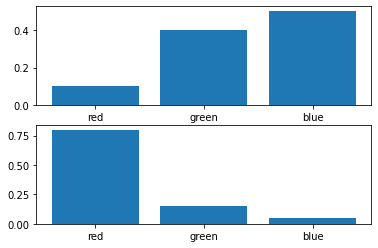

In [1]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

Running the example creates a histogram for each probability distribution, allowing the probabilities for each event to be directly compared.

We can see that indeed the distributions are different.

**Calculate Cross-Entropy Between Distributions**

Next, we can develop a function to calculate the cross-entropy between the two distributions.

We will use log base-2 to ensure the result has units in bits.

```
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])
```

We can then use this function to calculate the cross-entropy of P from Q, as well as the reverse, Q from P.

```
...
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)
```

Tying this all together, the complete example is listed below.

In [2]:
# example of calculating cross entropy
from math import log2

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])

# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


Running the example first calculates the cross-entropy of Q from P as just over 3 bits, then P from Q as just under 3 bits.

```
H(P, Q): 3.288 bits
H(Q, P): 2.906 bits
```

**Calculate Cross-Entropy Between a Distribution and Itself**

If two probability distributions are the same, then the cross-entropy between them will be the entropy of the distribution.

We can demonstrate this by calculating the cross-entropy of P vs P and Q vs Q.

The complete example is listed below.

In [3]:
# example of calculating cross entropy for identical distributions
from math import log2

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])

# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, P)
ce_pp = cross_entropy(p, p)
print('H(P, P): %.3f bits' % ce_pp)
# calculate cross entropy H(Q, Q)
ce_qq = cross_entropy(q, q)
print('H(Q, Q): %.3f bits' % ce_qq)

H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


Running the example first calculates the cross-entropy of Q vs Q which is calculated as the entropy for Q, and P vs P which is calculated as the entropy for P.

```
H(P, P): 1.361 bits
H(Q, Q): 0.884 bits
```

**Calculate Cross-Entropy Using KL Divergence**

We can also calculate the cross-entropy using the KL divergence.

The cross-entropy calculated with KL divergence should be identical, and it may be interesting to calculate the KL divergence between the distributions as well to see the relative entropy or additional bits required instead of the total bits calculated by the cross-entropy.

First, we can define a function to calculate the KL divergence between the distributions using log base-2 to ensure the result is also in bits.

```
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
```

Next, we can define a function to calculate the entropy for a given probability distribution.

```
# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])
Finally, we can calculate the cross-entropy using the entropy() and kl_divergence() functions.

# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
	return entropy(p) + kl_divergence(p, q)
To keep the example simple, we can compare the cross-entropy for H(P, Q) to the KL divergence KL(P || Q) and the entropy H(P).
```

The complete example is listed below.

In [4]:
# example of calculating cross entropy with kl divergence
from math import log2

# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])

# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
	return entropy(p) + kl_divergence(p, q)

# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate H(P)
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)
# calculate kl divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


Running the example, we can see that the cross-entropy score of 3.288 bits is comprised of the entropy of P 1.361 and the additional 1.927 bits calculated by the KL divergence.

This is a useful example that clearly illustrates the relationship between all three calculations.

```
H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits
```

### Cross-Entropy as a Loss Function

Cross-entropy is widely used as a loss function when optimizing classification models.

Two examples that you may encounter include the logistic regression algorithm (a linear classification algorithm), and artificial neural networks that can be used for classification tasks.

Classification problems are those that involve one or more input variables and the prediction of a class label.

Classification tasks that have just two labels for the output variable are referred to as binary classification problems, whereas those problems with more than two labels are referred to as categorical or multi-class classification problems.

* **Binary Classification:** Task of predicting one of two class labels for a given example.
* **Multi-Class Classification:** Task of predicting one of more than two class labels for a given example.

We can see that the idea of cross-entropy may be useful for optimizing a classification model.

Each example has a known class label with a probability of 1.0, and a probability of 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy can then be used to calculate the difference between the two probability distributions.

As such, we can map the classification of one example onto the idea of a random variable with a probability distribution as follows:

* **Random Variable:** The example for which we require a predicted class label.
* **Events:** Each class label that could be predicted.

In classification tasks, we know the target probability distribution P for an input as the class label 0 or 1 interpreted as probabilities as “impossible” or “certain” respectively. These probabilities have no surprise at all, therefore they have no information content or zero entropy.

Our model seeks to approximate the target probability distribution Q.

In the language of classification, these are the actual and the predicted probabilities, or y and yhat.

* **Expected Probability (y):** The known probability of each class label for an example in the dataset (P).
* **Predicted Probability (yhat):** The probability of each class label an example predicted by the model (Q).

We can, therefore, estimate the cross-entropy for a single prediction using the cross-entropy calculation described above; for example.

H(P, Q) = – sum x in X P(x) * log(Q(x))

Where each x in X is a class label that could be assigned to the example, and P(x) will be 1 for the known label and 0 for all other labels.

The cross-entropy for a single example in a binary classification task can be stated by unrolling the sum operation as follows:

H(P, Q) = – (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))

You may see this form of calculating cross-entropy cited in textbooks.

If there are just two class labels, the probability is modeled as the Bernoulli distribution for the positive class label. This means that the probability for class 1 is predicted by the model directly, and the probability for class 0 is given as one minus the predicted probability, for example:

* **Predicted P(class0)** = 1 – yhat
* **Predicted P(class1)** = yhat

When calculating cross-entropy for classification tasks, the base-e or natural logarithm is used. This means that the units are in nats, not bits.

We are often interested in minimizing the cross-entropy for the model across the entire training dataset. This is calculated by calculating the average cross-entropy across all training examples.

### Calculate Entropy for Class Labels

Recall that when two distributions are identical, the cross-entropy between them is equal to the entropy for the probability distribution.

Class labels are encoded using the values 0 and 1 when preparing data for classification tasks.

For example, if a classification problem has three classes, and an example has a label for the first class, then the probability distribution will be [1, 0, 0]. If an example has a label for the second class, it will have a probability distribution for the two events as [0, 1, 0]. This is called a one hot encoding.

This probability distribution has no information as the outcome is certain. We know the class. Therefore the entropy for this variable is zero.

This is an important concept and we can demonstrate it with a worked example.

Pretend with have a classification problem with 3 classes, and we have one example that belongs to each class. We can represent each example as a discrete probability distribution with a 1.0 probability for the class to which the example belongs and a 0.0 probability for all other classes.

We can calculate the entropy of the probability distribution for each “variable” across the “events“.

The complete example is listed below.



In [5]:
# entropy of examples from a classification task with 3 classes
from math import log2
from numpy import asarray

# calculate entropy
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])

# class 1
p = asarray([1,0,0]) + 1e-15
print(entropy(p))
# class 2
p = asarray([0,1,0]) + 1e-15
print(entropy(p))
# class 3
p = asarray([0,0,1]) + 1e-15
print(entropy(p))

9.805612959471341e-14
9.805612959471341e-14
9.805612959471341e-14


Running the example calculates the entropy for each random variable.

We can see that in each case, the entropy is 0.0 (actually a number very close to zero).

Note that we had to add a very small value to the 0.0 values to avoid the log() from blowing up, as we cannot calculate the log of 0.0.

As such, the entropy of a known class label is always 0.0.

This means that the cross entropy of two distributions (real and predicted) that have the same probability distribution for a class label, will also always be 0.0.

Recall that when evaluating a model using cross-entropy on a training dataset that we average the cross-entropy across all examples in the dataset.

Therefore, a cross-entropy of 0.0 when training a model indicates that the predicted class probabilities are identical to the probabilities in the training dataset, e.g. zero loss.

We could just as easily minimize the KL divergence as a loss function instead of the cross-entropy.

Recall that the KL divergence is the extra bits required to transmit one variable compared to another. It is the cross-entropy without the entropy of the class label, which we know would be zero anyway.

As such, minimizing the KL divergence and the cross entropy for a classification task are identical.

In practice, a cross-entropy loss of 0.0 often indicates that the model has overfit the training dataset, but that is another story.


### Calculate Cross-Entropy Between Class Labels and Probabilities

The use of cross-entropy for classification often gives different specific names based on the number of classes, mirroring the name of the classification task; for example:

* **Binary Cross-Entropy:** Cross-entropy as a loss function for a binary classification task.
* **Categorical Cross-Entropy:** Cross-entropy as a loss function for a multi-class classification task.

We can make the use of cross-entropy as a loss function concrete with a worked example.

Consider a two-class classification task with the following 10 actual class labels (P) and predicted class labels (Q).

```
...
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
```

We can enumerate these probabilities and calculate the cross-entropy for each using the cross-entropy function developed in the previous section using log() (natural logarithm) instead of log2().

```
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])
```

For each actual and predicted probability, we must convert the prediction into a distribution of probabilities across each event, in this case, the classes {0, 1} as 1 minus the probability for class 0 and probability for class 1.

We can then calculate the cross-entropy and repeat the process for all examples.

```
...
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)
```

Finally, we can calculate the average cross-entropy across the dataset and report it as the cross-entropy loss for the model on the dataset.

```
...
# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)
```

Tying this all together, the complete example is listed below.

In [6]:
# calculate cross entropy for classification problem
from math import log
from numpy import mean

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])

# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)

# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats
Average Cross Entropy: 0.247 nats


Running the example prints the actual and predicted probabilities for each example and the cross-entropy in nats.

The final average cross-entropy loss across all examples is reported, in this case, as 0.247 nats.

This is how cross-entropy loss is calculated when optimizing a logistic regression model or a neural network model under a cross-entropy loss function.

### Calculate Cross-Entropy Using Keras

We can confirm the same calculation by using the binary_crossentropy() function from the Keras deep learning API to calculate the cross-entropy loss for our small dataset.

The complete example is listed below.

Note: This example assumes that you have the Keras library installed (e.g. version 2.3 or higher) and configured with a backend library such as TensorFlow (version 2.0 or higher). If not, you can skip running this example.

In [7]:
# calculate cross entropy with keras
from numpy import asarray
from keras import backend
from keras.losses import binary_crossentropy
# prepare classification data
p = asarray([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
q = asarray([0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3])
# convert to keras variables
y_true = backend.variable(p)
y_pred = backend.variable(q)
# calculate the average cross-entropy
mean_ce = backend.eval(binary_crossentropy(y_true, y_pred))
print('Average Cross Entropy: %.3f nats' % mean_ce)

Average Cross Entropy: 0.247 nats


Running the example, we can see that the same average cross-entropy loss of 0.247 nats is reported.

This confirms the correct manual calculation of cross-entropy.

### Intuition for Cross-Entropy on Predicted Probabilities

We can further develop the intuition for the cross-entropy for predicted class probabilities.

For example, given that an average cross-entropy loss of 0.0 is a perfect model, what do average cross-entropy values greater than zero mean exactly?

We can explore this question no a binary classification problem where the class labels as 0 and 1. This is a discrete probability distribution with two events and a certain probability for one event and an impossible probability for the other event.

We can then calculate the cross entropy for different “predicted” probability distributions transitioning from a perfect match of the target distribution to the exact opposite probability distribution.

We would expect that as the predicted probability distribution diverges further from the target distribution that the cross-entropy calculated will increase.

The example below implements this and plots the cross-entropy result for the predicted probability distribution compared to the target of [0, 1] for two events as we would see for the cross-entropy in a binary classification task.

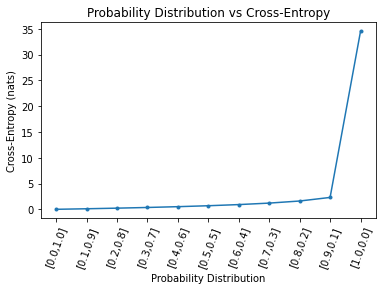

In [8]:
# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot

# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])

# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

Running the example calculates the cross-entropy score for each probability distribution then plots the results as a line plot.

We can see that as expected, cross-entropy starts at 0.0 (far left point) when the predicted probability distribution matches the target distribution, then steadily increases as the predicted probability distribution diverges.

We can also see a dramatic leap in cross-entropy when the predicted probability distribution is the exact opposite of the target distribution, that is, [1, 0] compared to the target of [0, 1].

We are not going to have a model that predicts the exact opposite probability distribution for all cases on a binary classification task.

As such, we can remove this case and re-calculate the plot.

The updated version of the code is listed below.

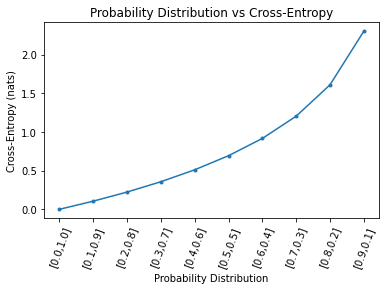

In [9]:
# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot

# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])

# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

Running the example gives a much better idea of the relationship between the divergence in probability distribution and the calculated cross-entropy.

We can see a super-linear relationship where the more the predicted probability distribution diverges from the target, the larger the increase in cross-entropy.

A plot like this can be used as a guide for interpreting the average cross-entropy reported for a model for a binary classification dataset.

For example, you can use these cross-entropy values to interpret the mean cross-entropy reported by Keras for a neural network model on a binary classification task, or a binary classification model in scikit-learn evaluated using the logloss metric.

You can use it to answer the general question:

What is a good cross-entropy score?

If you are working in nats (and you usually are) and you are getting mean cross-entropy less than 0.2, you are off to a good start, and less than 0.1 or 0.05 is even better.

On the other hand, if you are getting mean cross-entropy greater than 0.2 or 0.3 you can probably improve, and if you are getting a mean cross-entropy greater than 1.0, then something is going on and you’re making poor probability predictions on many examples in your dataset.

We can summarise these intuitions for the mean cross-entropy as follows:

* Cross-Entropy = 0.00: Perfect probabilities.
* Cross-Entropy < 0.02: Great probabilities.
* Cross-Entropy < 0.05: On the right track.
* Cross-Entropy < 0.20: Fine.
* Cross-Entropy > 0.30: Not great.
* Cross-Entropy > 1.00: Terrible.
* Cross-Entropy > 2.00 Something is broken.

This listing will provide a useful guide when interpreting a cross-entropy (log loss) from your logistic regression model, or your artificial neural network model.

You can also calculate separate mean cross-entropy scores per-class and help tease out on which classes you’re model has good probabilities, and which it might be messing up.

### Cross-Entropy Versus Log Loss

Cross-Entropy is not Log Loss, but they calculate the same quantity when used as loss functions for classification problems.

**Log Loss is the Negative Log Likelihood**

Logistic loss refers to the loss function commonly used to optimize a logistic regression model.

It may also be referred to as logarithmic loss (which is confusing) or simply log loss.

Many models are optimized under a probabilistic framework called the maximum likelihood estimation, or MLE, that involves finding a set of parameters that best explain the observed data.

This involves selecting a likelihood function that defines how likely a set of observations (data) are given model parameters. When a log likelihood function is used (which is common), it is often referred to as optimizing the log likelihood for the model. Because it is more common to minimize a function than to maximize it in practice, the log likelihood function is inverted by adding a negative sign to the front. This transforms it into a Negative Log Likelihood function or NLL for short.

In deriving the log likelihood function under a framework of maximum likelihood estimation for Bernoulli probability distribution functions (two classes), the calculation comes out to be:

* negative log-likelihood(P, Q) = -(P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))

This quantity can be averaged over all training examples by calculating the average of the log of the likelihood function.

Negative log-likelihood for binary classification problems is often shortened to simply “log loss” as the loss function derived for logistic regression.

* log loss = negative log-likelihood, under a Bernoulli probability distribution

We can see that the negative log-likelihood is the same calculation as is used for the cross-entropy for Bernoulli probability distribution functions (two events or classes). In fact, the negative log-likelihood for Multinoulli distributions (multi-class classification) also matches the calculation for cross-entropy.

### Log Loss and Cross Entropy Calculate the Same Thing

For classification problems, “log loss“, “cross-entropy” and “negative log-likelihood” are used interchangeably.

More generally, the terms “cross-entropy” and “negative log-likelihood” are used interchangeably in the context of loss functions for classification models.

Therefore, calculating log loss will give the same quantity as calculating the cross-entropy for Bernoulli probability distribution. We can confirm this by calculating the log loss using the log_loss() function from the scikit-learn API.

Calculating the average log loss on the same set of actual and predicted probabilities from the previous section should give the same result as calculating the average cross-entropy.

The complete example is listed below.

In [10]:
# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
ll = log_loss(y_true, y_pred)
print('Average Log Loss: %.3f' % ll)

Average Log Loss: 0.247


Running the example gives the expected result of 0.247 log loss, which matches 0.247 nats when calculated using the average cross-entropy.

This does not mean that log loss calculates cross-entropy or cross-entropy calculates log loss.

Instead, they are different quantities, arrived at from different fields of study, that under the conditions of calculating a loss function for a classification task, result in an equivalent calculation and result. Specifically, a cross-entropy loss function is equivalent to a maximum likelihood function under a Bernoulli or Multinoulli probability distribution.

This demonstrates a connection between the study of maximum likelihood estimation and information theory for discrete probability distributions.

It is not limited to discrete probability distributions, and this fact is surprising to many practitioners that hear it for the first time.

Specifically, a linear regression optimized under the maximum likelihood estimation framework assumes a Gaussian continuous probability distribution for the target variable and involves minimizing the mean squared error function. This is equivalent to the cross-entropy for a random variable with a Gaussian probability distribution.

This is a little mind blowing, and comes from the field of differential entropy for continuous random variables.

It means that if you calculate the mean squared error between two Gaussian random variables that cover the same events (have the same mean and standard deviation), then you are calculating the cross-entropy between the variables.

It also means that if you are using mean squared error loss to optimize your neural network model for a regression problem, you are in effect using a cross entropy loss.